#IMPORTS

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#LOAD DATA
mnist=tf.keras.datasets.mnist

#SPLITTING DATA
(x_train,y_train),(x_test,y_test)=mnist.load_data()

img_size=(28,28)

#CHECKING FOR IMAGE CHANNELS. IS ALPHA CHANNEL IS AT FIRST OR LAST?

In [0]:
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1],x_train.shape[2])
    x_test = x_test.reshape(x_test.shape[0], 1, x_train.shape[1],x_train.shape[2])
    input_shape = (1, x_train.shape[1],x_train.shape[2])
else:
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_train.shape[1],x_train.shape[2], 1)
    input_shape = (x_train.shape[1],x_train.shape[2], 1)

## HELPER FUNCTION TO PLOT IMAGES

In [0]:
def plot_images(images, cls_true, cls_pred=None,w=3,h=3):
    fig, axes = plt.subplots(w, h)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_size), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

#SHOWING FIRST 3 IMAGES FROM TRAINING SAMPLE

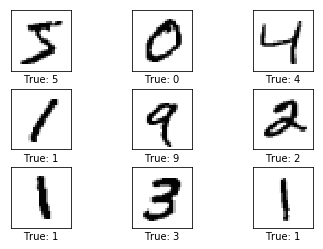

In [19]:
images=x_train[0:10]
true_cls=np.argmax(y_train[0:9],axis=1)
plot_images(images,true_cls)

#FORMATTING DATA AND ENCODING LABELS

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#CREATING A SEQUENTIAL MODEL
#MODEL ARCHITECTURE

In [0]:
model=tf.keras.models.Sequential()

#INPUT NODES
model.add(tf.keras.layers.Conv2D(32,(5,5),input_shape=input_shape,activation=tf.nn.relu))

#HIDDEN NODES
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Conv2D(32,(2,2),activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#OUTPUT NODES
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

#COMPILATION

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#TRAINING

In [9]:
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0358 - accuracy: 0.9883
Epoch 2/3
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0326 - accuracy: 0.9892
Epoch 3/3
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0293 - accuracy: 0.9901


#EVALUATE MODEL WITH TEST DATA

In [10]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#PREDICTING OUTPUT FROM TEST DATA

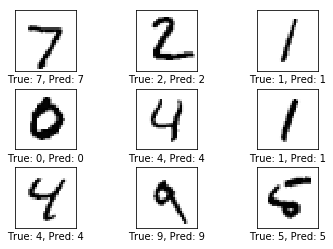

In [21]:
prediction=model.predict(x_test)
images=x_test[0:9]
true_cls=np.argmax(y_test[0:9],axis=1)
predicted_cls=np.argmax(prediction[0:9],axis=1)
plot_images(x_test,true_cls,predicted_cls)

#FOR DOWNLOADING MODEL FOR TENSOFLOW JS

In [0]:
!pip3 install tensorflowjs 
!mkdir model
model.save('conv.h5')
!ls
!tensorflowjs_converter --input_format keras \conv.h5 \model
!zip -r model.zip model 
!ls -l
from google.colab import files
files.download('model.zip')

#FOR SAVING KERAS MODEL TO GOOGLE DRIVE

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive
# create on Colab directory  
model_str = drive.CreateFile({'title' : 'convDigitRecognition.json'})
model_str.SetContentFile('convDigitRecognition.json')
model_file = drive.CreateFile({'title' : 'convDigitRecognition.h5'})
model_file.SetContentFile('convDigitRecognition.h5')
model_file.Upload()
model_str.Upload()

# download to google drive
drive.CreateFile({'m_id': model_file.get('id'),'j_id': model_str.get('id')})